In [2]:
from neuron import h, gui   # Standard "import" of the NEURON library into Python...
import matplotlib.pyplot as plt
import statistics 
import numpy as np
import seaborn as sns
h.load_file('stdrun.hoc')   # Activation of a NEURON library, to fine control the simulation...

1.0

#### Model Ball+Stick

In [2]:
soma = h.Section(name='soma')
soma.cm = 0.5
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
}


1.0

In [4]:
axon=h.Section(name='axon')
axon.nseg=100
axon.Ra=123
axon.L=200
axon.diam=2

In [5]:
h.psection(sec=axon)

axon { nseg=100  L=200  Ra=123
	/*location 0 attached to cell 1*/
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=2}
}


1.0

In [3]:
for sec in h.allsec():
    sec.insert('WBCN')
    print(sec)

soma


In [7]:
soma.insert('WBCN')
#axon.insert("pas")

soma

In [6]:
for seg in soma:
    seg.WBCN.NK*=0.1
    seg.WBCN.NNa*=0.1
    print (seg.x,seg.WBCN.NK)

0.5 1800.0


In [7]:
for seg in axon:
    seg.WBCN.NK*=0.1
    seg.WBCN.NNa*=0.1
    print (seg.x)

0.005
0.015
0.025
0.035
0.045000000000000005
0.05500000000000001
0.065
0.075
0.08499999999999999
0.09499999999999999
0.10499999999999998
0.11499999999999998
0.12499999999999997
0.13499999999999998
0.145
0.155
0.165
0.17500000000000002
0.18500000000000003
0.19500000000000003
0.20500000000000004
0.21500000000000005
0.22500000000000006
0.23500000000000007
0.24500000000000008
0.25500000000000006
0.26500000000000007
0.2750000000000001
0.2850000000000001
0.2950000000000001
0.3050000000000001
0.3150000000000001
0.3250000000000001
0.33500000000000013
0.34500000000000014
0.35500000000000015
0.36500000000000016
0.37500000000000017
0.3850000000000002
0.3950000000000002
0.4050000000000002
0.4150000000000002
0.4250000000000002
0.4350000000000002
0.44500000000000023
0.45500000000000024
0.46500000000000025
0.47500000000000026
0.48500000000000026
0.4950000000000003
0.5050000000000002
0.5150000000000002
0.5250000000000002
0.5350000000000003
0.5450000000000003
0.5550000000000003
0.5650000000000003
0.575

In [8]:
axon(0.005).WBCN.NNa*=100
axon(0.005).WBCN.NK*=100

In [9]:
axon.connect(soma,1)
h.topology()


|-|       soma(0-1)
   `---------------------------------------------------------------------------------------------------|       axon(0-1)



1.0

### Train impulse definition

In [25]:
tot=10000
freq=28          #ms -   Inter-stimulation interval
n=int(tot/freq)
#n=1
A= 20.9
#A= 0.38  # micro Ampere, the intensity of the current square pulse

iclamp=[]   # impulse train
t_in=[]
counter=0

for i in range(0,n):
    imp=h.IClamp(soma(0.5))    # This is positioned in the central point (0.5) of the soma "segment"
    #imp=h.IClamp(axon(0.5050000000000002))
    imp.delay=0+counter        # millisecond of delay, before switching on the current "square pulse"
    imp.amp=A
    imp.dur=0.27303           # millisecond of duration, of the square pulse waveform
    iclamp.append(imp)   # This is positioned in the central point (0.5) of the soma "segment"
    t_in.append(imp.delay)
    counter=imp.delay+freq

In [64]:
Aax=0.65
for seg in axon:
    counter=0
    for i in range(0,n):
        imp=h.IClamp(axon(seg.x))
        imp.delay=0+counter        # millisecond of delay, before switching on the current "square pulse"
        imp.amp=Aax
        imp.dur=0.27303           # millisecond of duration, of the square pulse waveform
        #iclamp.append(imp)   # This is positioned in the central point (0.5) of the soma "segment"
        #t_in.append(imp.delay)
        counter=imp.delay+freq

###  Model injection and record parameter

In [26]:
h.dt=0.01
#soma.insert('hhCN')  # This inserts two voltage-dependent conductances (Na, K) into the simulated membrane
h.psection()
v_vec = h.Vector()             # Membrane potential vector is created here
t_vec = h.Vector()             # Time stamp vector is created here
'''
v_vec_AIS = h.Vector()             # Membrane potential vector is created here
v_vec_ax = h.Vector() 
v_vec_ax1 = h.Vector() 
v_vec_ax2 = h.Vector() 
v_vec_ax3 = h.Vector() 
v_vec_ax4 = h.Vector() 
v_vec_axMiddle = h.Vector() 
m_som = h.Vector()             # Open Na gate variable vector is created here
h_som = h.Vector()             # Inactivation gate variable vector is created here
n_som = h.Vector()             # Open K gate variable vector is created here
m_som.record(soma(0.5).WBCN._ref_m) # The appropriate state-variable is linked to the vector
h_som.record(soma(0.5).WBCN._ref_h) # The appropriate state-variable is linked to the vector
n_som.record(soma(0.5).WBCN._ref_n) # The appropriate state-variable is linked to the vector
m_AIS = h.Vector()             # Open Na gate variable vector is created here
h_AIS = h.Vector()             # Inactivation gate variable vector is created here
n_AIS = h.Vector()             # Open K gate variable vector is created here
m_AIS.record(axon(0.005).WBCN._ref_m) # The appropriate state-variable is linked to the vector
h_AIS.record(axon(0.005).WBCN._ref_h) # The appropriate state-variable is linked to the vector
n_AIS.record(axon(0.005).WBCN._ref_n) # The appropriate state-variable is linked to the vector
m_midd = h.Vector()             # Open Na gate variable vector is created here
h_midd = h.Vector()             # Inactivation gate variable vector is created here
n_midd = h.Vector()             # Open K gate variable vector is created here
m_midd.record(axon(0.5050000000000002).WBCN._ref_m) # The appropriate state-variable is linked to the vector
h_midd.record(axon(0.5050000000000002).WBCN._ref_h) # The appropriate state-variable is linked to the vector
n_midd.record(axon(0.5050000000000002).WBCN._ref_n) # The appropriate state-variable is linked to the vector
m_end = h.Vector()             # Open Na gate variable vector is created here
h_end = h.Vector()             # Inactivation gate variable vector is created here
n_end = h.Vector()             # Open K gate variable vector is created here
m_end.record(axon(0.9950000000000007).WBCN._ref_m) # The appropriate state-variable is linked to the vector
h_end.record(axon(0.9950000000000007).WBCN._ref_h) # The appropriate state-variable is linked to the vector
n_end.record(axon(0.9950000000000007).WBCN._ref_n) # The appropriate state-variable is linked to the vector
v_vec.record(soma(0.5)._ref_v) # The voltage of the soma section is linked to the vector v_vec
v_vec_AIS.record(axon(0.005)._ref_v) # The appropriate state-variable is linked to the vector
v_vec_ax1.record(axon(0.20500000000000004)._ref_v)
v_vec_ax2.record(axon(0.4050000000000002)._ref_v)
v_vec_ax3.record(axon(0.6050000000000003)._ref_v)
v_vec_ax4.record(axon(0.8050000000000005)._ref_v)
v_vec_ax.record(axon(0.9950000000000007)._ref_v)
v_vec_axMiddle.record(axon(0.5050000000000002)._ref_v)
'''
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)         # The absolute time of the simulation is linked to the vector t_vec

h.v_init = -60                # Let's set the initial condition of the membrane potential

h.t     =   0.0               # Let's reset the initial time of the simulation to 0 ms
h.tstop = float(tot)   

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
	insert WBCN { se_WBCN=-1 gnabar_WBCN=0.08 gkbar_WBCN=0.036 gl_WBCN=0.0003 el_WBCN=-54.3 NNa_WBCN=6000 NK_WBCN=1800}
	insert na_ion { ena=50}
	insert k_ion { ek=-77}
	insert IClamp { del=0 dur=0.27303 amp=20.9}
	insert IClamp { del=28 dur=0.27303 amp=20.9}
	insert IClamp { del=56 dur=0.27303 amp=20.9}
	insert IClamp { del=84 dur=0.27303 amp=20.9}
	insert IClamp { del=112 dur=0.27303 amp=20.9}
	insert IClamp { del=140 dur=0.27303 amp=20.9}
	insert IClamp { del=168 dur=0.27303 amp=20.9}
	insert IClamp { del=196 dur=0.27303 amp=20.9}
	insert IClamp { del=224 dur=0.27303 amp=20.9}
	insert IClamp { del=252 dur=0.27303 amp=20.9}
	insert IClamp { del=280 dur=0.27303 amp=20.9}
	insert IClamp { del=308 dur=0.27303 amp=20.9}
	insert IClamp { del=336 dur=0.27303 amp=20.9}
	insert IClamp { del=364 dur=0.27303 amp=20.9}
	insert IClamp { del=392 dur=

In [27]:
h.run()

Changed dt


0.0

### Simulation results

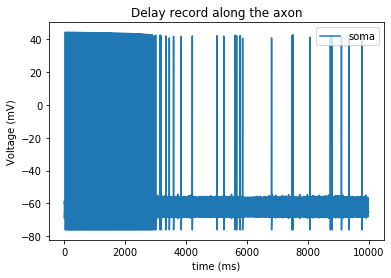

In [28]:
plt.plot(t_vec, v_vec,label="soma")
#plt.plot(t_vec, v_vec_AIS,label="AIS")
#plt.plot(t_vec, v_vec_ax,label="axon end")
plt.xlabel('time (ms)')
plt.title('Delay record along the axon')
plt.ylabel('Voltage (mV)')
plt.legend(loc="upper right")
#plt.xlim(0,2)
#plt.savefig("soma_axon/voltage_delay1.png",bbox_inches='tight')

Text(0, 0.5, 'Voltage (mV)')

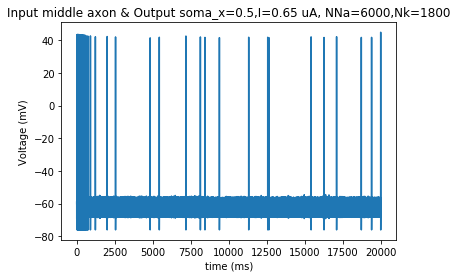

In [67]:
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.title('Input middle axon & Output soma_x=0.5,I=0.65 uA, NNa=6000,Nk=1800')
plt.ylabel('Voltage (mV)')
#plt.savefig("soma_axon/middle_soma_in/voltage_soma.png",bbox_inches='tight')
#plt.show()

Text(0, 0.5, 'Voltage (mV)')

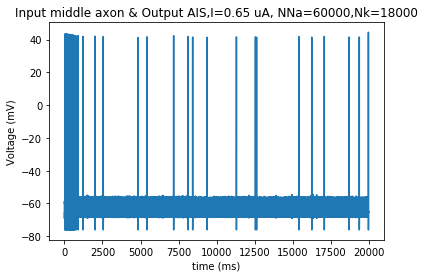

In [68]:
plt.plot(t_vec, v_vec_AIS)
plt.xlabel('time (ms)')
plt.title('Input middle axon & Output AIS,I=0.65 uA, NNa=60000,Nk=18000')
plt.ylabel('Voltage (mV)')
#plt.savefig("soma_axon/middle_soma_in/voltage_AIS.png",bbox_inches='tight')
#plt.show()

Text(0, 0.5, 'Voltage (mV)')

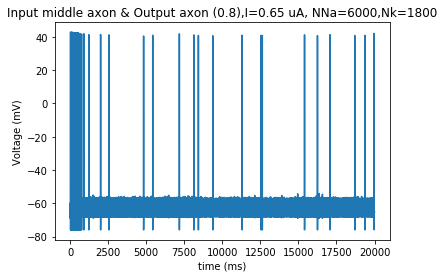

In [69]:
plt.plot(t_vec, v_vec_ax4)
plt.xlabel('time (ms)')
plt.title('Input middle axon & Output axon (0.8),I=0.65 uA, NNa=6000,Nk=1800')
plt.ylabel('Voltage (mV)')
#plt.savefig("soma_axon/middle_soma_in/voltage_0.8_axon.png",bbox_inches='tight')

Text(0, 0.5, 'Voltage (mV)')

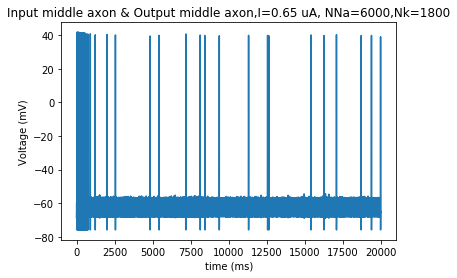

In [70]:
plt.plot(t_vec, v_vec_axMiddle)
plt.xlabel('time (ms)')
plt.title('Input middle axon & Output middle axon,I=0.65 uA, NNa=6000,Nk=1800')
plt.ylabel('Voltage (mV)')
#plt.savefig("soma_axon/middle_soma_in/voltage_axonMiddle.png",bbox_inches='tight')

### Channels

(0, 100)

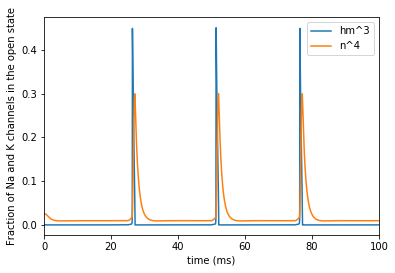

In [20]:
plt.plot(t_vec, m_som * m_som * m_som * h_som , t_vec, n_som * n_som * n_som * n_som)
#plt.plot(t_vec, m_AIS * m_AIS * m_AIS * h_AIS , t_vec, n_AIS * n_AIS * n_AIS * n_AIS)
plt.xlabel('time (ms)')
plt.ylabel('Fraction of Na and K channels in the open state')
plt.legend(('hm^3', 'n^4'),loc="best")
plt.xlim(0,100)
#plt.show()
#plt.savefig("soma/fract_100.png",bbox_inches = "tight")

(0, 100)

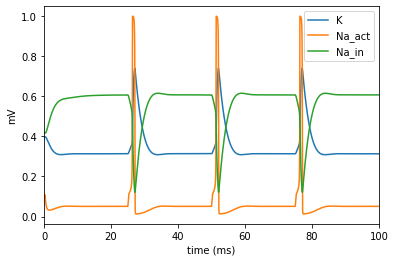

In [21]:
plt.plot(t_vec, n_AIS)
plt.plot(t_vec, m_AIS)
plt.plot(t_vec, h_AIS)
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.legend(('K', 'Na_act', 'Na_in'))
plt.xlim(0,100)
#plt.show()
#plt.savefig("soma/chann_100.png",bbox_inches = "tight")

### Latency

In [29]:
def Latency(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    t_out=[]
    lat=[]
    t_lat=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=max(v[indx1:indx2])
        if(aux>5):
            aux_t=int(t1[v.index(aux)]/freq)*freq
            lat.append(t1[v.index(aux)]-aux_t)
            t_lat.append(aux_t/1000)
    return lat,t_lat

In [30]:
lat_soma,t_lat_soma=Latency(v_vec,t_vec,n,freq)
'''
lat_AIS,t_lat_AIS=Latency(v_vec_AIS,t_vec,n,freq)
lat_ax1,t_lat_ax1=Latency(v_vec_ax1,t_vec,n,freq)
lat_ax2,t_lat_ax2=Latency(v_vec_ax2,t_vec,n,freq)
lat_ax3,t_lat_ax3=Latency(v_vec_ax3,t_vec,n,freq)
lat_ax4,t_lat_ax4=Latency(v_vec_ax4,t_vec,n,freq)
lat_ax,t_lat_ax=Latency(v_vec_ax,t_vec,n,freq)
lat_axM,t_lat_axM=Latency(v_vec_axMiddle,t_vec,n,freq)
'''

'\nlat_AIS,t_lat_AIS=Latency(v_vec_AIS,t_vec,n,freq)\nlat_ax1,t_lat_ax1=Latency(v_vec_ax1,t_vec,n,freq)\nlat_ax2,t_lat_ax2=Latency(v_vec_ax2,t_vec,n,freq)\nlat_ax3,t_lat_ax3=Latency(v_vec_ax3,t_vec,n,freq)\nlat_ax4,t_lat_ax4=Latency(v_vec_ax4,t_vec,n,freq)\nlat_ax,t_lat_ax=Latency(v_vec_ax,t_vec,n,freq)\nlat_axM,t_lat_axM=Latency(v_vec_axMiddle,t_vec,n,freq)\n'

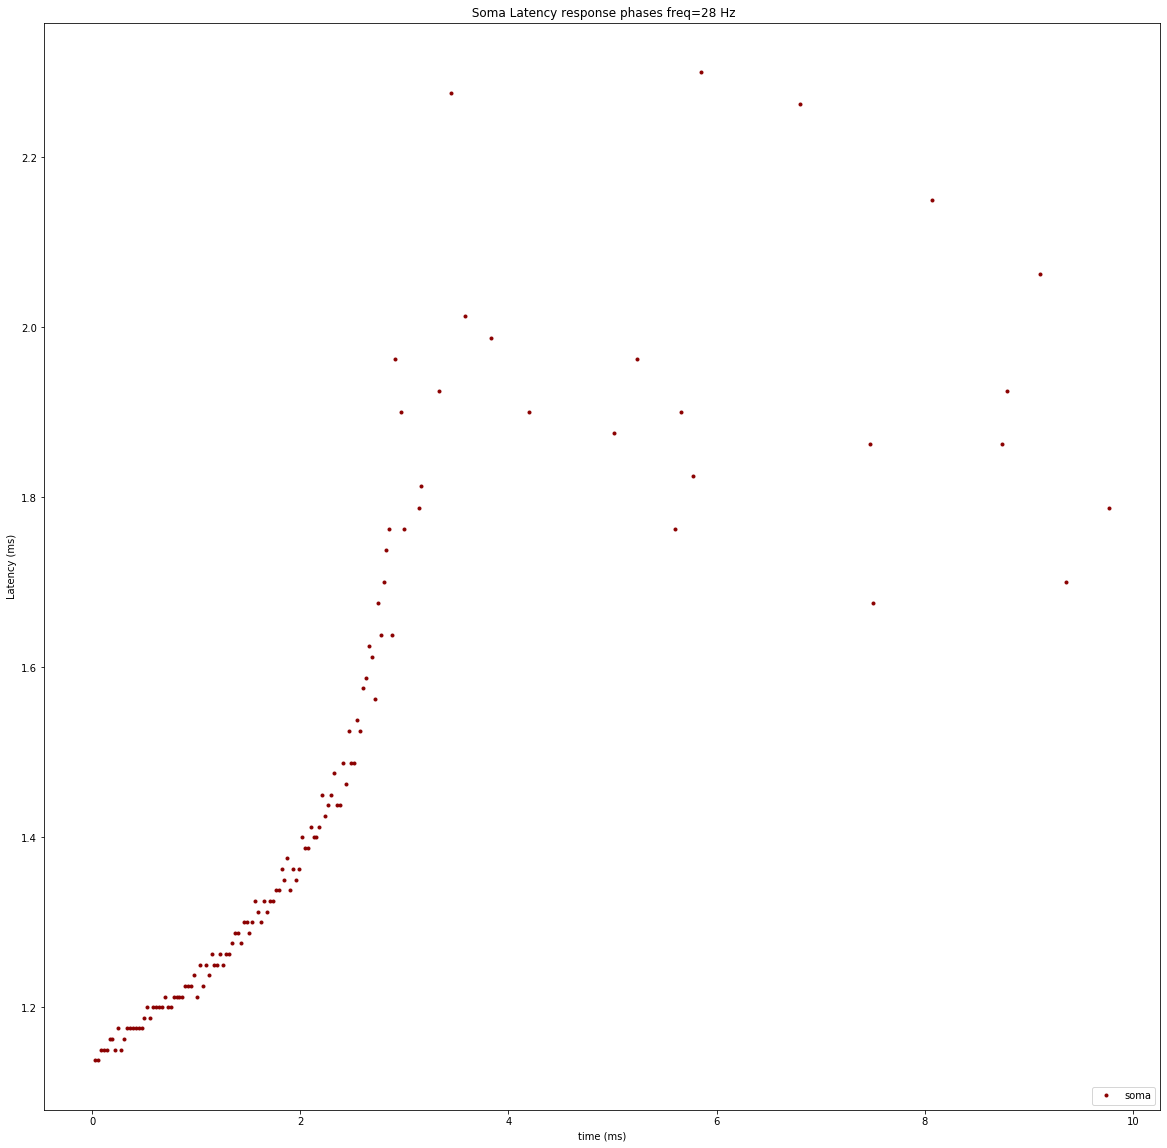

In [41]:
plt.figure(figsize=(20,20))

plt.plot(t_lat_soma, lat_soma, '.', color='darkred', label="soma")

'''
plt.plot(t_lat_AIS, lat_AIS, '.', color='lightgreen', label="AIS")
plt.plot(t_lat_ax1, lat_ax1, '.', color='red', label="axon (0.2)")
plt.plot(t_lat_ax2, lat_ax2, '.', color='yellow', label="axon (0.4)")
plt.plot(t_lat_axM, lat_axM, '.', color='black', label="axon (0.5)")
plt.plot(t_lat_ax3, lat_ax3, '.', color='green', label="axon (0.6)")
plt.plot(t_lat_ax4, lat_ax4, '.', color='blue', label="axon (0.8)")
plt.plot(t_lat_ax, lat_ax, '.', color='pink', label="end axon")
#plt.plot(t_lat_L_1000, lat_L_1000, '.', color='yellow', label="diam=1000, I=41.8 uA")
#plt.plot(t_lat_60, lat_60, '.', color='purple', label="15 Hz")
#plt.plot(t_lat_100, lat_100, '.', color='pink', label="10 Hz")
#plt.plot(t_lat_200, lat_200, '.', color='lightblue', label="5 Hz")
#plt.plot(t_lat_1000, lat_1000, '.', color='black', label="1 Hz")
'''
plt.xlabel('time (ms)')
plt.ylabel('Latency (ms)')
plt.title(' Soma Latency response phases freq=28 Hz')
plt.legend(loc="lower right")
#plt.xlim(0,1)
#plt.ylim(top=6)
plt.savefig("graphs/electrical/soma/Latency_all.png")

#### Nspikes

In [88]:
def Count(v_vec):
    count=0
    #Npeak=[]
    Na=0
    for i in range(0,len(v_vec)):
        #Npeak.append(0)
        if(count==0 and v_vec[i]>=-10.):
            count=1
            Na+=1;
            #Npeak.append(1)
        if(count==1 and v_vec[i]<-10.):
            count=0
            #Npeak.append(0)
    return Na


def Nspike(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    N_out=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=v[indx1:indx2]
        N_out.append(Count(aux))
    t_out=[i for i in range(0,n)]
    return N_out,t_out

In [89]:
N_soma,t_soma=Nspike(v_vec,t_vec,20,1000)
N_AIS,t_AIS=Nspike(v_vec_AIS,t_vec,20,1000)
N_ax1,t_ax1=Nspike(v_vec_ax1,t_vec,20,1000)
N_ax2,t_ax2=Nspike(v_vec_ax2,t_vec,20,1000)
N_ax3,t_ax3=Nspike(v_vec_ax3,t_vec,20,1000)
N_ax4,t_ax4=Nspike(v_vec_ax4,t_vec,20,1000)
N_axend,t_axend=Nspike(v_vec_ax,t_vec,20,1000)
N_axM,t_axM=Nspike(v_vec_axMiddle,t_vec,20,1000)

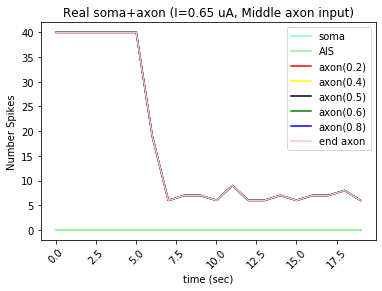

In [91]:
plt.plot(t_soma,N_soma,color='aquamarine')
plt.plot(t_AIS,N_AIS,color='lightgreen')
plt.plot(t_ax1,N_ax1,color='red')
plt.plot(t_ax2,N_ax2,color='yellow')
plt.plot(t_axM,N_axM,color='black')
plt.plot(t_ax3,N_ax3,color='green')
plt.plot(t_ax4,N_ax4,color='blue')
plt.plot(t_axend,N_axend,color='pink')
#plt.plot(N_Spike_40.s, N_Spike_40.N,color='yellow')
#plt.axvline(x=20, color='k', linestyle='--')
plt.xticks(rotation=45)
plt.legend(["soma","AIS","axon(0.2)","axon(0.4)","axon(0.5)","axon(0.6)","axon(0.8)","end axon"])
plt.title("Real soma+axon (I=0.65 uA, Middle axon input)")
#plt.title("Guler stochastic model (corrected variance,I=7.9 uA)")
plt.ylabel("Number Spikes")
plt.xlabel("time (sec)")
plt.savefig("soma_axon/middle_soma_in/Nspike.png",bbox_inches = "tight")
plt.show()

#### peak Intensity

In [92]:
def Intensity(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    t_out=[]
    intens=[]
    t_p=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=max(v[indx1:indx2])
        aux_t=int(t1[v.index(aux)]/freq)*freq
        intens.append(aux)
        t_p.append(aux_t/1000)
    return intens,t_p

In [93]:
int_soma,t_int_soma=Intensity(v_vec,t_vec,n,freq)
int_AIS,t_int_AIS=Intensity(v_vec_AIS,t_vec,n,freq)
int_ax,t_int_ax=Intensity(v_vec_ax,t_vec,n,freq)
int_ax1,t_int_ax1=Intensity(v_vec_ax1,t_vec,n,freq)
int_ax2,t_int_ax2=Intensity(v_vec_ax2,t_vec,n,freq)
int_axM,t_int_axM=Intensity(v_vec_axMiddle,t_vec,n,freq)
int_ax3,t_int_ax3=Intensity(v_vec_ax3,t_vec,n,freq)
int_ax4,t_int_ax4=Intensity(v_vec_ax4,t_vec,n,freq)

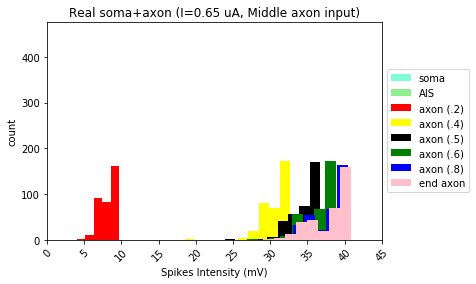

In [99]:
plt.hist(int_soma, bins=60,color = 'aquamarine',label = "soma")
plt.hist(int_AIS, bins=60,color = 'lightgreen',label = "AIS")
plt.hist(int_ax1, bins=60,color = 'red',label = "axon (.2)")
plt.hist(int_ax2,bins=60,color = 'yellow',label = "axon (.4)")
plt.hist(int_axM,bins=60,color = 'black',label = "axon (.5)")
plt.hist(int_ax3,bins=60,color = 'green',label = "axon (.6)")
plt.hist(int_ax4,bins=60,color = 'blue',label = "axon (.8)")
plt.hist(int_ax,bins=60,color = 'pink',label = "end axon")

plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Real soma+axon (I=0.65 uA, Middle axon input)")
plt.ylabel("count")
plt.xlabel("Spikes Intensity (mV)")
#plt.ylim([0,90])
plt.xlim([0,45])
plt.savefig("soma_axon/middle_soma_in/hist_Int_spike_som1.png",bbox_inches = "tight")
plt.show()

### ISI

In [100]:
def Spike_time(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    t_out=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=max(v[indx1:indx2])
        if(aux>5):
            t_out.append(t1[v.index(aux)])
    return t_out

def ISI(v_vec,t_vec,n,freq):
    t_spike=Spike_time(v_vec,t_vec,n,freq)
    isi=[]
    for i in range(len(t_spike)-1,0,-1):
        isi.append(t_spike[i]-t_spike[i-1])
    isi.reverse()
    return isi

In [101]:
isi_soma=ISI(v_vec,t_vec,n,freq)
isi_AIS=ISI(v_vec_AIS,t_vec,n,freq)
isi_ax=ISI(v_vec_ax,t_vec,n,freq)
isi_ax1=ISI(v_vec_ax1,t_vec,n,freq)
isi_ax2=ISI(v_vec_ax2,t_vec,n,freq)
isi_axM=ISI(v_vec_axMiddle,t_vec,n,freq)
isi_ax3=ISI(v_vec_ax3,t_vec,n,freq)
isi_ax4=ISI(v_vec_ax4,t_vec,n,freq)

NameError: name 's' is not defined

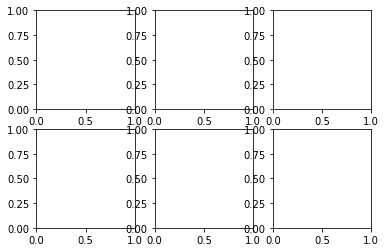

In [3]:
fig, ((ax1,ax2,axM),(ax3,ax4,ax5)) = plt.subplots(2,3)
#fig=plt.figure(figsize=(1520,1520))
#ax1.hist(isi_soma, bins=60,color = 'aquamarine',label = "soma")
s.hist(isi_soma, bins=30,color = 'orange',label = "soma")
#ax.set_xlim([27,2000])
#ax.set_ylim([0,20])
ax.hist(isi_AIS, bins=30,color = 'lightgreen',label = "AIS")
#ax.set(xlabel='time (ms)', ylabel='count ISIs')
#ax.set_xlim([27,2000])
#ax.set_ylim([0,20])
ax2.hist(isi_ax1, bins=30,color = 'red',label = "axon (.2)")
ax2.set(xlabel='time (ms)')
ax2.set(xlabel='time (ms)', ylabel='count ISIs')
ax2.set_ylim([0,20])
ax2.set_xlim([27,1000])
ax2.hist(isi_ax2,bins=30,color = 'yellow',label = "axon (.4)")
ax2.set(xlabel='time (ms)')
ax2.set_ylim([0,20])
ax2.set_xlim([27,1000])
axM.hist(isi_axM,bins=30,color = 'black',label = "axon (.5)")
axM.set(xlabel='time (ms)')
axM.set_ylim([0,20])
axM.set_xlim([27,1000])
ax3.hist(isi_ax3,bins=30,color = 'green',label = "axon (.6)")
ax3.set(xlabel='time (ms)', ylabel='count ISIs')
ax3.set_ylim([0,20])
ax3.set_xlim([27,1000])
ax4.hist(isi_ax4,bins=30,color = 'blue',label = "axon (.8)")
ax4.set(xlabel='time (ms)')
ax4.set_ylim([0,20])
ax4.set_xlim([27,1000])
ax5.hist(isi_ax,bins=30,color = 'pink',label = "end axon")
ax5.set(xlabel='time (ms)')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Soma+axon ISI (Input Middle axon, I=0.65 uA)")
ax5.set_ylim([0,20])
ax5.set_xlim([27,1000])
plt.savefig("soma_axon/middle_soma_in/PDF1.png",bbox_inches = "tight")